<a href="https://colab.research.google.com/github/MrsIgnis/MMO_tasks/blob/main/MMO_task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **I. Загрузка библиотек и предобратка данных**

In [63]:
!pip install pandas scikit-learn seaborn scipy

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Загрузка набора данных
df = pd.read_csv('/content/pokemon.csv')

df['Legendary'] = df['Legendary'].astype(int)
df.Legendary = df.Legendary.astype('category') # Чтобы эти значения не попадали в числовые и мы работали только с этим столбцом
df['Type 1'] = df['Type 1'].astype('category')
df['Type 2'] = df['Type 2'].astype('category')
df['Generation'] = df['Generation'].astype('category')  # Generation - это тоже дискретная переменная

Y = df['Legendary']
df = df.drop('#', axis=1) # Удаляю столбец #, это индексы
df = df.drop('Name', axis=1) # Удаляю столбец Name
X = df.drop('Legendary', axis=1)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Type 1      800 non-null    category
 1   Type 2      414 non-null    category
 2   Total       800 non-null    int64   
 3   HP          800 non-null    int64   
 4   Attack      800 non-null    int64   
 5   Defense     800 non-null    int64   
 6   Sp. Atk     800 non-null    int64   
 7   Sp. Def     800 non-null    int64   
 8   Speed       800 non-null    int64   
 9   Generation  800 non-null    category
 10  Legendary   800 non-null    category
dtypes: category(4), int64(7)
memory usage: 48.7 KB


In [66]:
# Создаем копию данных
X_processed = X.copy()

category_columns: list[str] = X_processed.select_dtypes(include=['category']).columns # Собираем колонки, помеченные как category

# Применяем One-Hot Encoding
X_processed = pd.get_dummies(X_processed, columns=category_columns, drop_first=True) # drop_first=True позволяет избежать мультиколлинеарности, удаляя первый уровень категориальной переменной.

In [67]:
X_processed

Total  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Type 1_Dark  \
0      318  45      49       49       65       65     45        False   
1      405  60      62       63       80       80     60        False   
2      525  80      82       83      100      100     80        False   
3      625  80     100      123      122      120     80        False   
4      309  39      52       43       60       50     65        False   
..     ...  ..     ...      ...      ...      ...    ...          ...   
795    600  50     100      150      100      150     50        False   
796    700  50     160      110      160      110    110        False   
797    600  80     110       60      150      130     70        False   
798    680  80     160       60      170      130     80        False   
799    600  80     110      120      130       90     70        False   

     Type 1_Dragon  Type 1_Electric  ...  Type 2_Poison  Type 2_Psychic  \
0            False            False  ...           True           False   
1            False            False  ...           True           False   
2            False            False  ...           True           False   
3            False            False  ...           True           False   
4            False            False  ...          False           False   
..             ...              ...  ...            ...             ...   
795          False            False  ...          False           False   
796          False            False  ...          False           False   
797          False            False  ...          False           False   
798          False            False  ...          False           False   
799          False            False  ...          False           False   

     Type 2_Rock  Type 2_Steel  Type 2_Water  Generation_2  Generation_3  \
0          False         False         False         False         False   
1          False         False         False         False         False   
2          False         False         False         False         False   
3          False         False         False         False         False   
4          False         False         False         False         False   
..           ...           ...           ...           ...           ...   
795        False         False         False         False         False   
796        False         False         False         False         False   
797        False         False         False         False         False   
798        False         False         False         False         False   
799        False         False          True         False         False   

     Generation_4  Generation_5  Generation_6  
0           False         False         False  
1           False         False         False  
2           False         False         False  
3           False         False         False  
4           False         False         False  
..            ...           ...           ...  
795         False         False          True  
796         False         False          True  
797         False         False          True  
798         False         False          True  
799         False         False          True  

[800 rows x 46 columns]

In [68]:
# Переменная для бинарной классификации
X_binary = X_processed
y_binary = Y

In [69]:
# Проверка баланса бинарной классификаци
y_binary.value_counts()

Legendary
0    735
1     65
Name: count, dtype: int64

In [70]:
# Переменная для мультиклассовой классификации
y_multi = df['Generation']

X_multi = df.drop('Generation', axis=1)

category_columns: list[str] = X.select_dtypes(include=['category']).columns

# Преобразуем категориальные признаки в дамми-переменные
X_processed_multi = pd.get_dummies(X_multi, drop_first=True)

# Проверяем результат
X_processed_multi.head()

Total  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Type 1_Dark  \
0    318  45      49       49       65       65     45        False   
1    405  60      62       63       80       80     60        False   
2    525  80      82       83      100      100     80        False   
3    625  80     100      123      122      120     80        False   
4    309  39      52       43       60       50     65        False   

   Type 1_Dragon  Type 1_Electric  ...  Type 2_Grass  Type 2_Ground  \
0          False            False  ...         False          False   
1          False            False  ...         False          False   
2          False            False  ...         False          False   
3          False            False  ...         False          False   
4          False            False  ...         False          False   

   Type 2_Ice  Type 2_Normal  Type 2_Poison  Type 2_Psychic  Type 2_Rock  \
0       False          False           True           False        False   
1       False          False           True           False        False   
2       False          False           True           False        False   
3       False          False           True           False        False   
4       False          False          False           False        False   

   Type 2_Steel  Type 2_Water  Legendary_1  
0         False         False        False  
1         False         False        False  
2         False         False        False  
3         False         False        False  
4         False         False        False  

[5 rows x 42 columns]

In [71]:
# Проверка баланса мультиклассовой классификации
y_multi.value_counts()

Generation
1    166
5    165
3    160
4    121
2    106
6     82
Name: count, dtype: int64

# **II. Бинарная классификация**

**2.1 На дисбалансе**

In [72]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
import numpy as np

# Функция для выполнения K-Fold Cross-Validation
def k_fold_cross_validation(X, y, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    accuracies = []

    # Реализация K-Fold вручную
    for train_index, test_index in kf.split(X):
        model = LogisticRegression(max_iter=1000)
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Обучение модели на тренировочной выборке
        model.fit(X_train, y_train)

        # Предсказания на тестовой выборке
        y_pred = model.predict(X_test)

        # Оценка метрик
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')

        accuracies.append(accuracy)

    # Выводим средние значения метрик
    print(f"K-Fold Cross-Validation - Средняя точность: {np.mean(accuracies)}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Пример использования функции для бинарной классификации
X_binary = X_processed  # Исходные данные для бинарной классификации
y_binary = Y  # Целевая переменная для бинарной классификации

k_fold_cross_validation(X_binary, y_binary)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

K-Fold Cross-Validation - Средняя точность: 0.9425000000000001

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       145
           1       0.54      0.47      0.50        15

    accuracy                           0.91       160
   macro avg       0.74      0.71      0.73       160
weighted avg       0.91      0.91      0.91       160



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Вывод: изначально выборка данных довольно несбалансированная (меньше 10% у класса 1) => метрики качества лучше себя показывают при оценке класса 0 (нелегендарные покемоны). Модель гораздо лучше находит их (практически идеально), но с другим классом (легендарных особей) она только наполовину верна (чуть больше 50% найденных ею особей из 1 класса действительно ими и оказались, с остальными она ошиблась из-за изначального большого дисбаланса классов, что также влияет на большую среднюю точность, которая по большей части зависит от класса 0, с которым у модели нет проблем).

**2.2 Классификация с отбором признаков на дисбалансе**

In [73]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
import numpy as np

# Функция для выполнения K-Fold Cross-Validation с отбором признаков
def k_fold_cross_validation_with_sfs(X, y, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    accuracies = []

    # Отбор признаков с помощью SFS
    model = LogisticRegression(max_iter=1000)
    sfs = SFS(estimator=model, k_features="best", forward=True, floating=False, scoring='accuracy', cv=5)
    sfs = sfs.fit(X, y)

    # Применяем отобранные признаки
    X_selected = X.iloc[:, list(sfs.k_feature_idx_)]

    # Получаем список отобранных признаков
    selected_features = list(X.columns[list(sfs.k_feature_idx_)])
    print(f"Отобранные признаки: {selected_features}")

    # Реализация K-Fold вручную
    for train_index, test_index in kf.split(X_selected):
        X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Обучение модели на тренировочной выборке
        model.fit(X_train, y_train)

        # Предсказания на тестовой выборке
        y_pred = model.predict(X_test)

        # Оценка метрик
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')

        accuracies.append(accuracy)

    # Выводим средние значения метрик
    print(f"K-Fold Cross-Validation with Feature Selection - Средняя точность: {np.mean(accuracies)}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Пример использования функции для бинарной классификации с отбором признаков
X_binary = X_processed  # Исходные данные для бинарной классификации
y_binary = Y  # Целевая переменная для бинарной классификации

k_fold_cross_validation_with_sfs(X_binary, y_binary)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Отобранные признаки: ['Total', 'HP', 'Attack', 'Defense', 'Speed', 'Type 1_Fairy', 'Type 1_Fighting', 'Type 1_Flying', 'Type 1_Ghost', 'Type 1_Ground', 'Type 1_Water', 'Type 2_Dragon', 'Type 2_Fairy']
K-Fold Cross-Validation with Feature Selection - Средняя точность: 0.93875

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       145
           1       0.50      0.40      0.44        15

    accuracy                           0.91       160
   macro avg       0.72      0.68      0.70       160
weighted avg       0.90      0.91      0.90       160



Вывод: сейчас модель отобрала лучшие признаки (опять же дисбаланс остался), по которым она будет судить, легендарный ли покемон или нет. Точность с изначальным отчётом чуть больше стала (буквально на пару - тройку тысячных процентов). Но со всеми остальными метриками получился спорный результат (возможно, из-за выбора способа отбора признаков): только precision увеличился на 1%, а все остальные показатели, наоборот, местами ухудшились. Модель ещё хуже теперь отбирает особей из класса 1.

**2.3 Классификация после борьбы с дисбалансом с помощью over_sampling**

In [74]:
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
import numpy as np

# Сначала боремся с дисбалансом классов
def balance_data_with_BLsmote(X, y):
    borderline_smote = BorderlineSMOTE(random_state=42)
    X_balanced, y_balanced = borderline_smote.fit_resample(X, y)

    class_counts = y_balanced.value_counts()
    print(f"Количество экземпляров каждого класса после балансировки:\n{class_counts}")
    return X_balanced, y_balanced

# Функция для выполнения K-Fold Cross-Validation
def k_fold_cross_validation(X, y, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    accuracies = []
    precision_scores = []
    recall_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Обучение модели на тренировочной выборке
        model = LogisticRegression(max_iter=1000)
        model.fit(X_train, y_train)

        # Предсказания на тестовой выборке
        y_pred = model.predict(X_test)

        # Оценка метрик
        accuracy = accuracy_score(y_test, y_pred)

        accuracies.append(accuracy)

    # Выводим средние значения метрик
    print("\nРезультаты классификации после балансировки данных:")
    print(f"Средняя точность: {np.mean(accuracies)}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Пример использования

# Сначала балансируем весь набор данных
X_balanced, y_balanced = balance_data_with_BLsmote(X_binary, y_binary)

# Затем выполняем классификацию
k_fold_cross_validation(X_balanced, y_balanced)

Количество экземпляров каждого класса после балансировки:
Legendary
0    735
1    735
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Результаты классификации после балансировки данных:
Средняя точность: 0.9659863945578231

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       139
           1       0.97      0.97      0.97       155

    accuracy                           0.97       294
   macro avg       0.97      0.97      0.97       294
weighted avg       0.97      0.97      0.97       294



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Вывод: поборовшись с дисбаланском классов (ниже опишу, почему именно этот способ в over_sampling выбрала), мы наконец-то видим хорошие результаты метрик. Теперь у нас одинаковое количество экземпляров обоих классов. В сравнении с изначальным отчётом средняя точность улучшилась на 2 процента (хотя, казалось бы, мы увеличили количество особей 1 класса с 65 до 735). Но и остальные метрики тоже выросли. Модель и до этого хорошо отбирала представителей 0 класса, а сейчас все отобранные, по её мнению, особи для 0 класса практически со 100% вероятностью ими и являются (показатели увеличись на 1-2%). Ну и для 1 класса признаки тоже радуют теперь: если раньше модель с вероятностью где-то 50% только отбирала особей для 1 класса, которые реально ими и оказывались (хотя, скорее всего, она просто и угадывала на рандоме, а не на аналогии с обучающей выборкой), то сейчас модель с абсолютно такой же вероятностью, как и для 0 класса, находит (причём верно), представителей для 1 класса, ведь все показатели выросли аж до 0.97 (где-то на 40 - 50 единиц).

Вывод по способу борьбы с дисбалансом: я протестировала несколько методов в over_sampling и остановилась на BorderlineSMOTE, потому что:
1) в SMOTE только recall на 1 единицу ниже, чем в BorderlineSMOTE. А так всё остальное абсолютно идентично;
2) ADASYN хуже борется с дисбалансом (0: 735 и 1:731). Сами показатели в отчёте тоже равны 0.97, но средняя точность на пару - тройку тысячных процентов хуже;
3) SMOTENC я не стала пробовать, потому что там нужны смешанные данные, а у меня в этих классах они приведены к одному типу;
4) KMeans-SMOTE тоже на пару-тройку тысчных процентов хуже себя показал в средней точности, остальные метрики идентичные с BorderlineSMOTE.

Да и по описанию этого способа он больше всего подходит для такой, несбалансированной, выборки, создавая новые объекты только на границах между классами, где модель чаще всего и может ошибаться.

**2.4 Классификация после борьбы с дисбалансом с помощью under_sampling**

In [75]:
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
import numpy as np

# Сначала боремся с дисбалансом классов
def balance_data_with_ENN(X, y):
    enn = EditedNearestNeighbours()
    X_balanced, y_balanced = enn.fit_resample(X, y)

    class_counts = y_balanced.value_counts()
    print(f"Количество экземпляров каждого класса после балансировки:\n{class_counts}")
    return X_balanced, y_balanced

# Функция для выполнения K-Fold Cross-Validation
def k_fold_cross_validation(X, y, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    accuracies = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Обучение модели на тренировочной выборке
        model = LogisticRegression(max_iter=1000)
        model.fit(X_train, y_train)

        # Предсказания на тестовой выборке
        y_pred = model.predict(X_test)

        # Оценка метрик
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')

        accuracies.append(accuracy)

    # Выводим средние значения метрик
    print("\nРезультаты классификации после балансировки данных:")
    print(f"Средняя точность: {np.mean(accuracies)}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Пример использования

# Сначала балансируем весь набор данных
X_balanced, y_balanced = balance_data_with_ENN(X_binary, y_binary)

# Затем выполняем классификацию
k_fold_cross_validation(X_balanced, y_balanced)

Количество экземпляров каждого класса после балансировки:
Legendary
0    691
1     65
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Результаты классификации после балансировки данных:
Средняя точность: 0.9722028581387244

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       139
           1       0.90      0.75      0.82        12

    accuracy                           0.97       151
   macro avg       0.94      0.87      0.90       151
weighted avg       0.97      0.97      0.97       151



Вывод: модель уменьшила количество данных в 0 классе до 691 (я остановилась на способе Edited Nearest Neighbors, ниже о нём), что повлияло на все остальные показатели. Средняя точность, в сравнении с изначальным отчётом, увеличилась на три процента, а умение модели отличать представителей обоих классов гораздо улучшилось (для 0 класса показатели тоже увеличились на пару - тройку %, достигнув почти 100%). Для 1 класса показатели сильно тоже выросли (была примерно 50% вероятность, что модель выберет экземпляры 1 класса, которые ими и являются, а скорее всего просто угадает, а сейчас она с 90% вероятностью точно отбирает подходящих особей для легендарных покемонов, и их количество относительно остальных легендарных покемонов привысило 70%, когда раньше было 47%. Ну и macro avg с weighted avg тоже стали получше, несмотря на то, что представителей класса 1 не так много даже после борьбы с дисбалансом.

Вывод по поводу выбранного метода: изначально меня смутило, что как-то плохо с дисбалансом поборолся Edited Nearest Neighbors, потому что я обратила внимание только на количество особей в каждом классе. Но после я ещё сравнила метрики, что и послужило остановке на этом способе:
1) Cluster Centroids сравнял количество покемонов до 65 в обоих классах, но сильно переобучил модель (precision для 0 и recall для 1 стали равны 1.00 => данный способ, вероятно, избавился от каких-то важных данных, в связи с чем модель просто зазубрила данные в обеих выборках, но не факт, что поняла алгоритм, по которому происходит разделение данных);
2) Tomek Links практически не избавился от дисбаланса, снизив количество покемонов 0 класса с 735 до 729, из-за чего модель всё также плохо работает с легендарными особями (всего лишь 67% ею отобранных по-настояющему ими и являются, что составляет всего 53% от всего количества особей 1 класса).
3) NearMiss 1 уменьшил до 65 представителей класса 0, сравняв их с 1 классом, но от этого сильно упала средняя точность (до 66%), метрики тоже не стали сильно лучше, едва превышая 75%. Значит, модель удалила слишком много важных данных;
4) NearMiss 2 чуть лучше оказалась в сравнении с её первой версией, но далека от звания лучшего способа борьбы с дисбалансом из-за всё ещё низких значений метрик и точности;
5)  NearMiss 3, почему-то, ещё больше решил уменьшить количество экзмепляров 0 класса (до 46), что вообще ухудшило модель окончательно, снизив её точность до 57% и все остальные метрики тоже.

Даже несмотря на то, что выбранный мною метод несильно поборолся с дисбалансом в плане количества покемонов в обоих классах, но он удалил именно те объекты из большего класса, которые неправильно классифицируются ближайшими соседями, что повлияло сильно на модель (в лучшую сторону).

# **III. Мультиклассовая классификация**

**3.1 На дисбалансе**

In [76]:
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

tree_model = DecisionTreeClassifier(random_state=42, max_depth=10)

# Создаем Stratified K-Fold для кросс-валидации
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Список для хранения метрик
accuracy_scores = []
classification_reports = []

# Кросс-валидация
for train_index, test_index in skf.split(X_processed_multi, y_multi):
    X_train, X_test = X_processed_multi.iloc[train_index], X_processed_multi.iloc[test_index]
    y_train, y_test = y_multi.iloc[train_index], y_multi.iloc[test_index]

    # Обучаем модель
    tree_model.fit(X_train, y_train)

    # Прогнозируем на тестовой выборке
    y_pred = tree_model.predict(X_test)

    # Оценка метрик
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    classification_reports.append(classification_report(y_test, y_pred))

# Выводим результаты
print(f"Средняя точность: {np.mean(accuracy_scores):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Средняя точность: 0.2850

Classification Report:
               precision    recall  f1-score   support

           1       0.61      0.33      0.43        33
           2       0.00      0.00      0.00        21
           3       0.15      0.06      0.09        32
           4       0.25      0.08      0.12        24
           5       0.22      0.79      0.34        33
           6       0.00      0.00      0.00        17

    accuracy                           0.26       160
   macro avg       0.21      0.21      0.16       160
weighted avg       0.24      0.26      0.20       160



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Вывод: модель, обученная на изначальном несбалансированном наборе данных, показывает уж очень плохие результаты, не находя вовсе преставителей 2 и 6 классов (в качестве целевой переменной выбрала поколения Generation). А то, что она посчитала правильными экземплярами для 3 и 4 класса, составляет менее 1% от общего количества каждого из их представителей. Ну и сама по себе средняя точность даже меньше 30%.

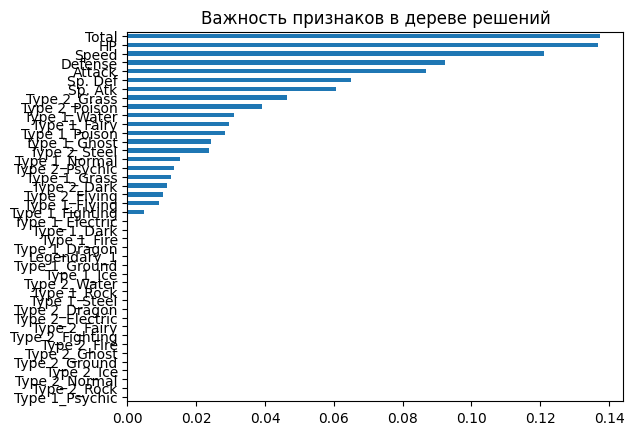

In [77]:
import matplotlib.pyplot as plt

feature_importances = pd.Series(tree_model.feature_importances_, index=X_processed_multi.columns)
feature_importances.sort_values().plot(kind='barh')
plt.title('Важность признаков в дереве решений')
plt.show()

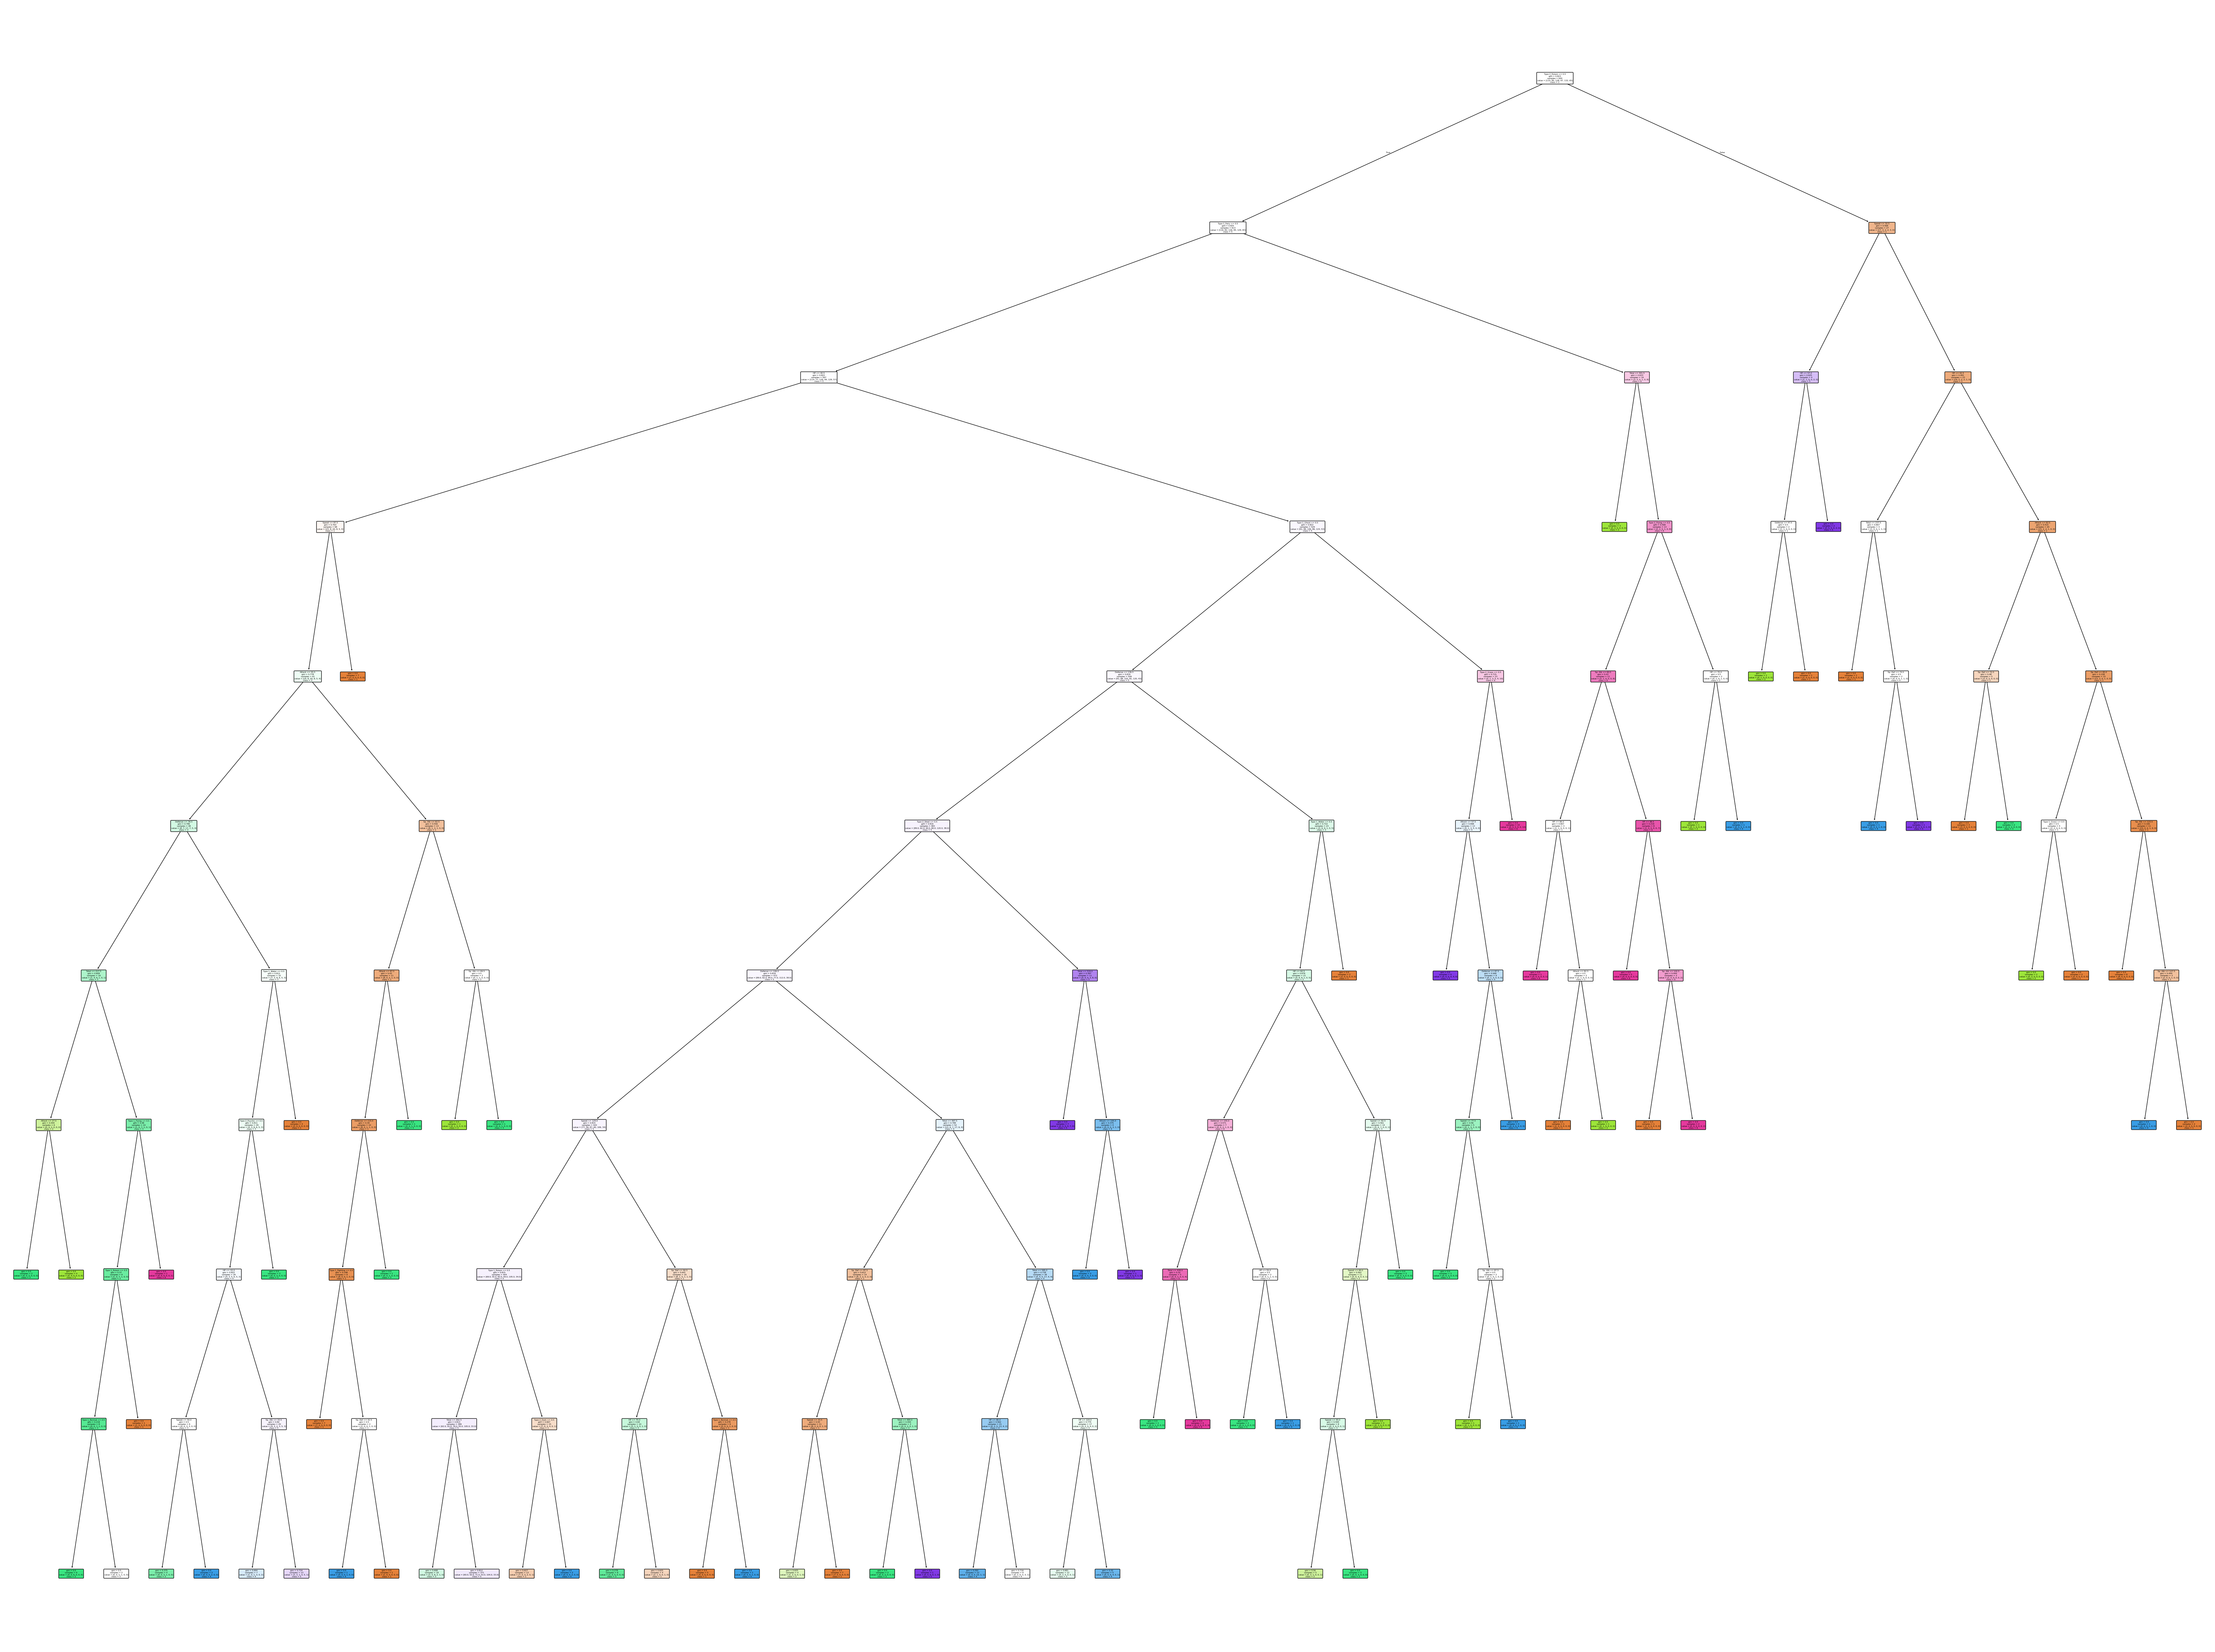

In [78]:
from sklearn.tree import plot_tree
# Визуализируем дерево решений
plt.figure(figsize=(80, 60))
plot_tree(tree_model, feature_names=X_processed_multi.columns, class_names=[str(item) for item in sorted(y_multi.unique())], filled=True, rounded=True)
plt.show()

**3.2 Классификация после борьбы с дисбалансом с помощью over_sampling**

In [79]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_processed_multi, y_multi)

tree_model = DecisionTreeClassifier(random_state=42, max_depth=10)

# Создаем Stratified K-Fold для кросс-валидации
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Список для хранения метрик
accuracy_scores = []
classification_reports = []

# Кросс-валидация
for train_index, test_index in skf.split(X_balanced, y_balanced):
    X_train, X_test = X_balanced.iloc[train_index], X_balanced.iloc[test_index]
    y_train, y_test = y_balanced.iloc[train_index], y_balanced.iloc[test_index]

    # Обучаем модель
    tree_model.fit(X_train, y_train)

    # Прогнозируем на тестовой выборке
    y_pred = tree_model.predict(X_test)

    # Оценка метрик
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    classification_reports.append(classification_report(y_test, y_pred))

# Выводим результаты
class_counts = y_balanced.value_counts()
print(f"Количество экземпляров каждого класса после балансировки:\n{class_counts}")
print(f"Средняя точность: {np.mean(accuracy_scores):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Количество экземпляров каждого класса после балансировки:
Generation
1    166
2    166
3    166
4    166
5    166
6    166
Name: count, dtype: int64
Средняя точность: 0.2772

Classification Report:
               precision    recall  f1-score   support

           1       0.45      0.27      0.34        33
           2       0.67      0.36      0.47        33
           3       0.31      0.15      0.20        33
           4       0.35      0.21      0.26        33
           5       0.24      0.47      0.31        34
           6       0.32      0.55      0.40        33

    accuracy                           0.34       199
   macro avg       0.39      0.34      0.33       199
weighted avg       0.39      0.34      0.33       199



Вывод: даже после борьбы с дисбалансом (а я выбрала наиболее хорошо справившийся с этим метод) результат не прям идеальный. Средняя точность стала даже чуть хуже (было 28%, а теперь 27%), но все остальные метрики в сравнении с несбалансированной выборкой улучшились, а главное пропало недообучение при нахождении покемонов 2 и 6 классов. Но для этого пришлось пожертвовать метриками у 1 класса. Если раньше модель лучшего всего находила именно этот класс, то сейчас то, что она посчитает покемонами 1 поколения, не факт, что она угадает. Теперь же модель лучше себя проявляет при поиске представителей 2 класса.

Вывод по поводу выбранной модели:
1) ADASYN вообще не смог сгенерировать отчёт и побороться с диссбалансом, выдав ошибку. Для него эта выборка сбалансированная;
2) Borderline-SMOTE справился похуже, чем SMOTE (все показатели гораздо меньше, но что странно, так это средняя точность, которая, наоборот, чуть лучше = 0.2781);
3) SMOTENC не подходит, нет смешанных типов данных;
4) KMeans-SMOTE тоже выдал ошибку. Видимо, какой-то их экземпляров он не смог разделить на кластеры, потому что тот изначально слишком маленький и неделимый вовсе.

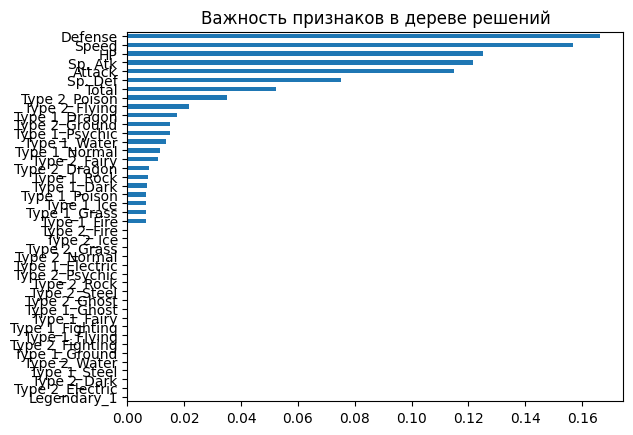

In [80]:
import matplotlib.pyplot as plt

feature_importances = pd.Series(tree_model.feature_importances_, index=X_processed_multi.columns)
feature_importances.sort_values().plot(kind='barh')
plt.title('Важность признаков в дереве решений')
plt.show()

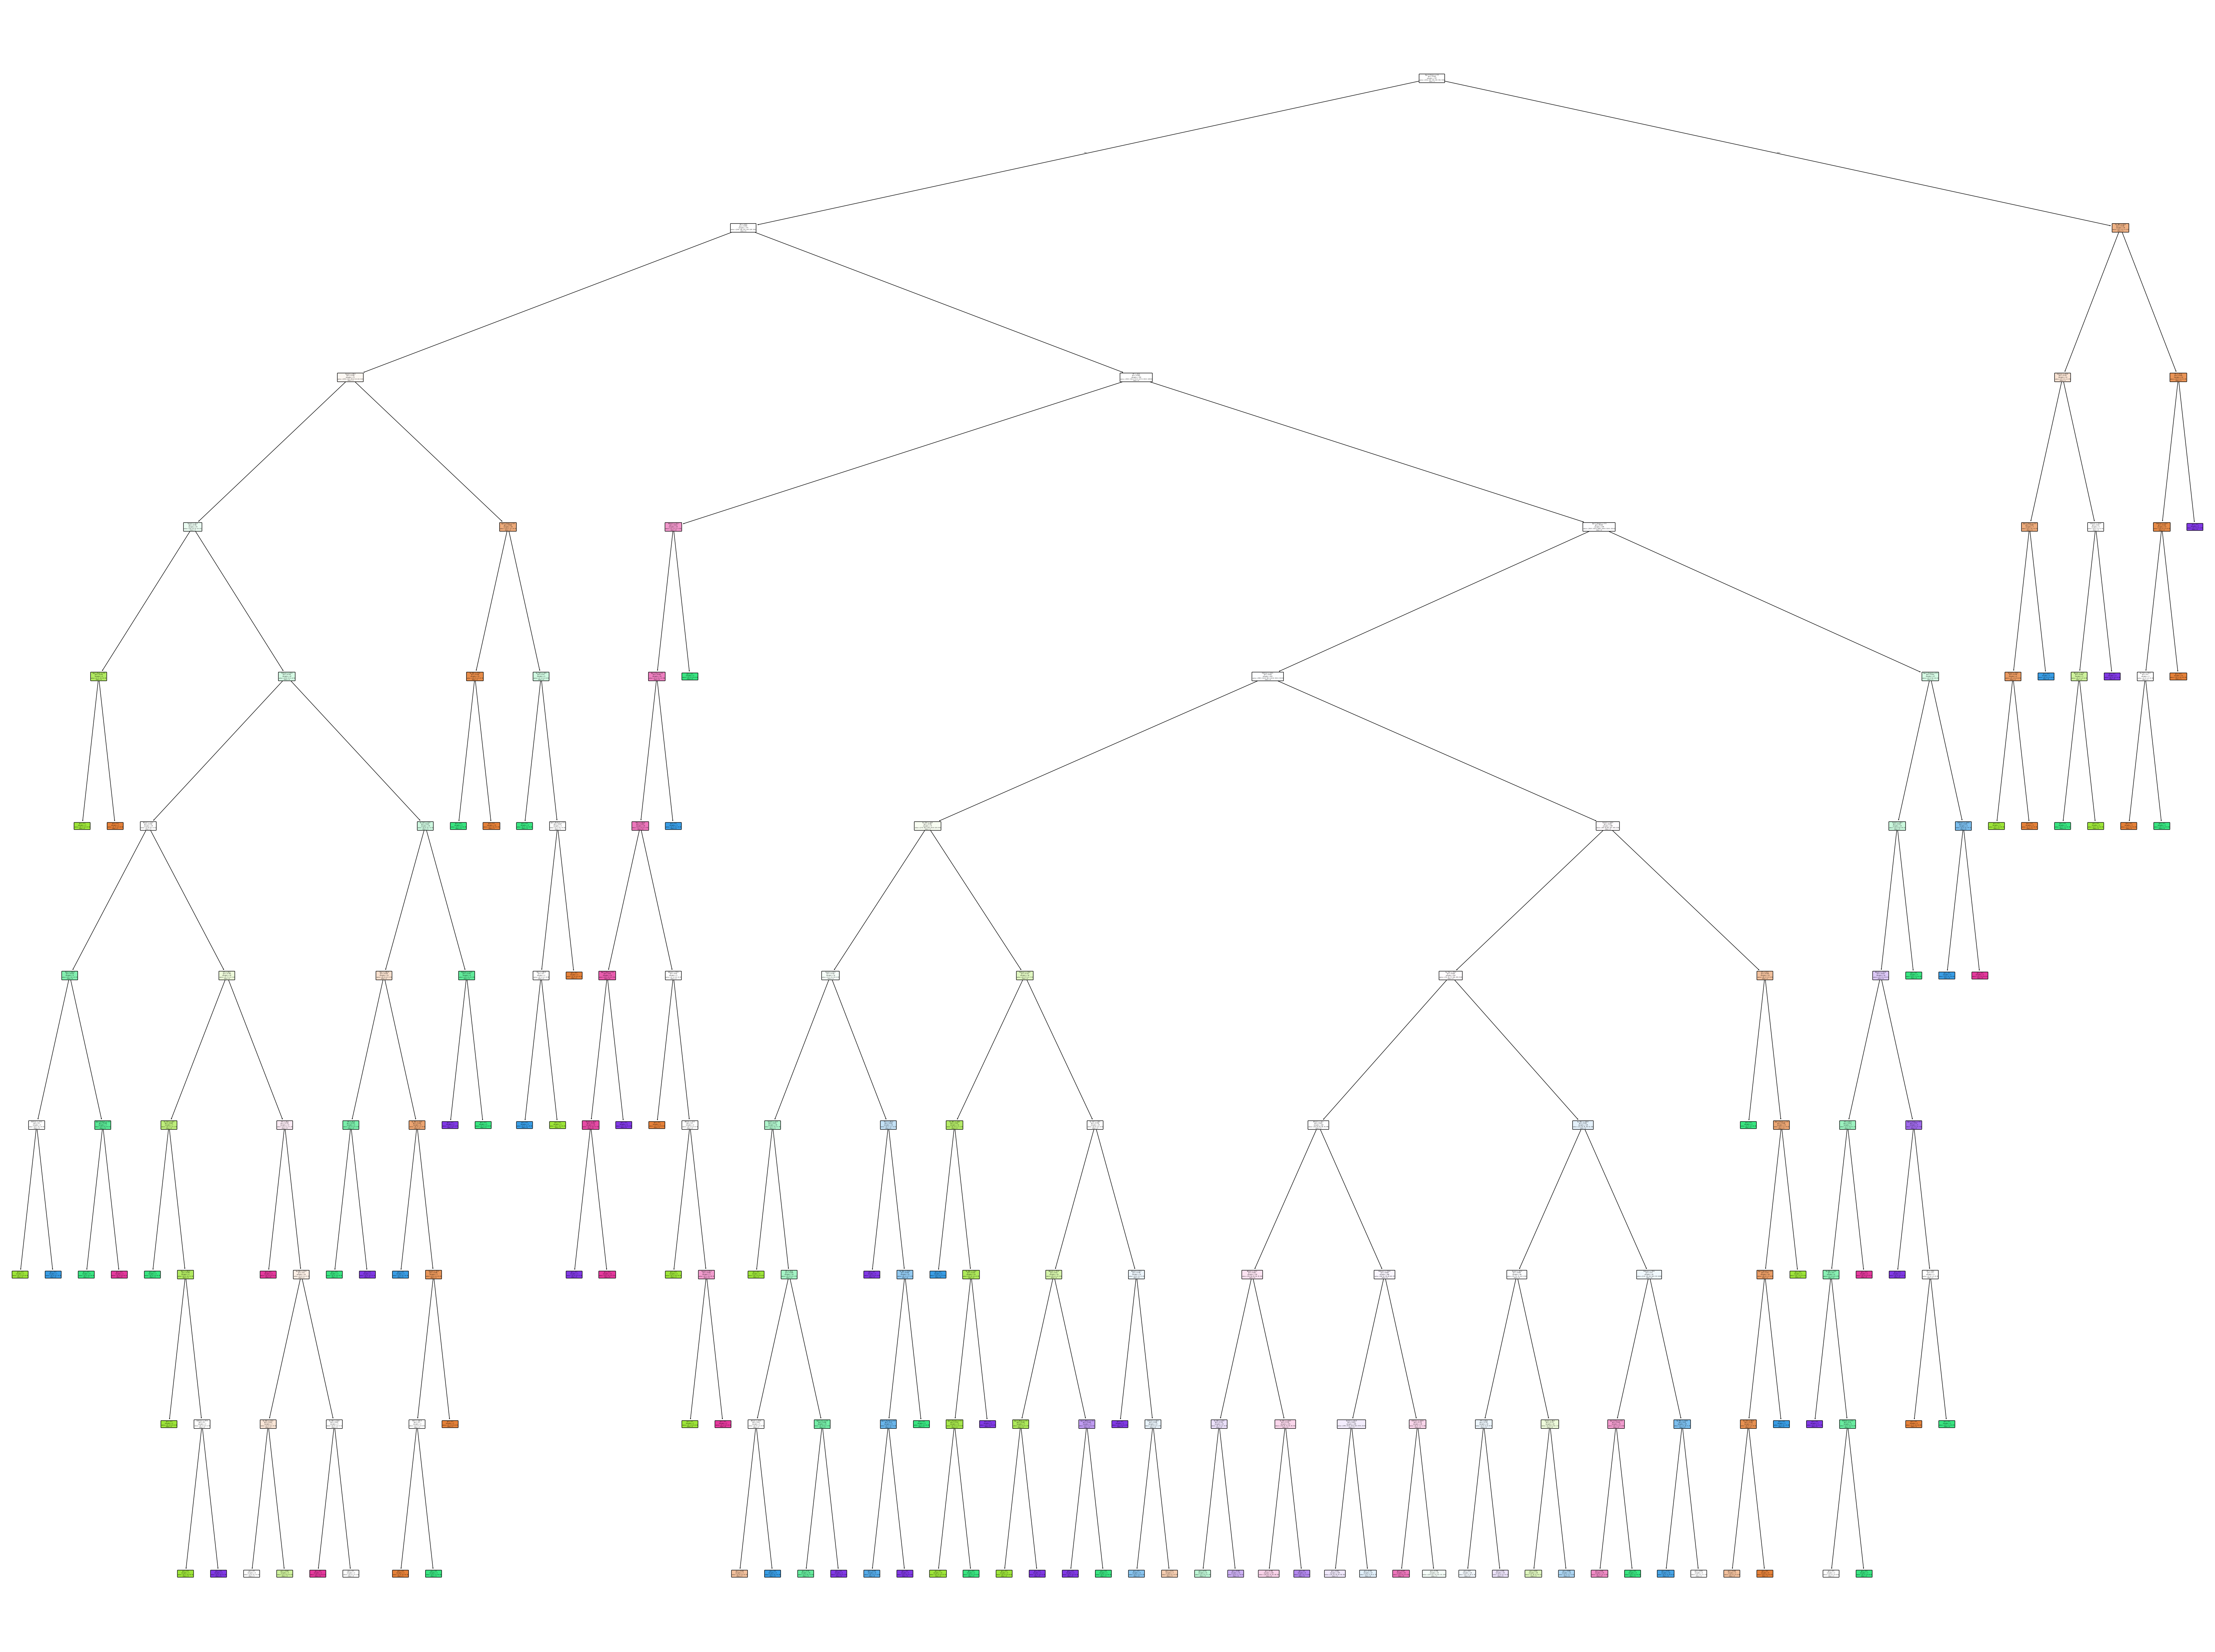

In [81]:
from sklearn.tree import plot_tree
# Визуализируем дерево решений
plt.figure(figsize=(80, 60))
plot_tree(tree_model, feature_names=X_processed_multi.columns, class_names=[str(item) for item in sorted(y_multi.unique())], filled=True, rounded=True)
plt.show()

**3.3 Классификация после борьбы с дисбалансом с помощью under_sampling**

In [82]:
from sklearn.model_selection import StratifiedKFold
from imblearn.under_sampling import NearMiss
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

nm = NearMiss(version=2)
X_balanced, y_balanced = nm.fit_resample(X_processed_multi, y_multi)

tree_model = DecisionTreeClassifier(random_state=42, max_depth=10)

# Создаем Stratified K-Fold для кросс-валидации
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Список для хранения метрик
accuracy_scores = []
classification_reports = []

# Кросс-валидация
for train_index, test_index in skf.split(X_balanced, y_balanced):
    X_train, X_test = X_balanced.iloc[train_index], X_balanced.iloc[test_index]
    y_train, y_test = y_balanced.iloc[train_index], y_balanced.iloc[test_index]

    # Обучаем модель
    tree_model.fit(X_train, y_train)

    # Прогнозируем на тестовой выборке
    y_pred = tree_model.predict(X_test)

    # Оценка метрик
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    classification_reports.append(classification_report(y_test, y_pred))

# Выводим результаты
class_counts = y_balanced.value_counts()
print(f"Количество экземпляров каждого класса после балансировки:\n{class_counts}")
print(f"Средняя точность: {np.mean(accuracy_scores):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Количество экземпляров каждого класса после балансировки:
Generation
1    82
2    82
3    82
4    82
5    82
6    82
Name: count, dtype: int64
Средняя точность: 0.2845

Classification Report:
               precision    recall  f1-score   support

           1       0.22      0.25      0.24        16
           2       0.17      0.19      0.18        16
           3       0.14      0.12      0.13        17
           4       0.33      0.31      0.32        16
           5       0.25      0.18      0.21        17
           6       0.29      0.38      0.32        16

    accuracy                           0.23        98
   macro avg       0.23      0.24      0.23        98
weighted avg       0.23      0.23      0.23        98



Вывод: средняя точность после борьбы с дисбалансом чуть уменьшилась (была 0.2850), но в сравнении с изначальным отчётом модель научилась (хоть и всё ещё плохо) находить представителей 2 и 6 поколений. Но если сравнивать методы борьбы, то повышение экземпляров в сравнении с понижением их количества гораздо лучше себя проявляет. А так в целом модель всё также плохо будет находить всех покемонов всех поколений.

Вывод по поводу выбранной модели:
1) Cluster Centroids не смог ни разу определить покемонов 2 поколения, но 6 всё-таки нашёл;
2) Tomek Links также не находит представителей 2 поколения;
3) Edited Nearest Neighbors вообще разделил данные так, что ни у 1, ни у 2 поколений не должно быть представителей. На этом можно было бы закончить разговор об этом способе, но что касается метрик, то часть из них переобучилась после такого распределия, а часть, наоборот, вообще необучилась, не найдя никого из 3 поколения;
4) NearMiss все хорошо справились, но 2 версия всё равно чуть лучше себя проявила в сравнении с 1 и 3 (особенно 3, которая не смогла найти покемонов 4 поколения).

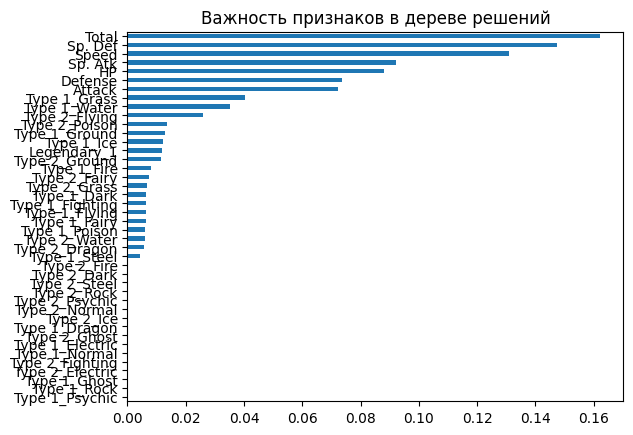

In [83]:
import matplotlib.pyplot as plt

feature_importances = pd.Series(tree_model.feature_importances_, index=X_processed_multi.columns)
feature_importances.sort_values().plot(kind='barh')
plt.title('Важность признаков в дереве решений')
plt.show()

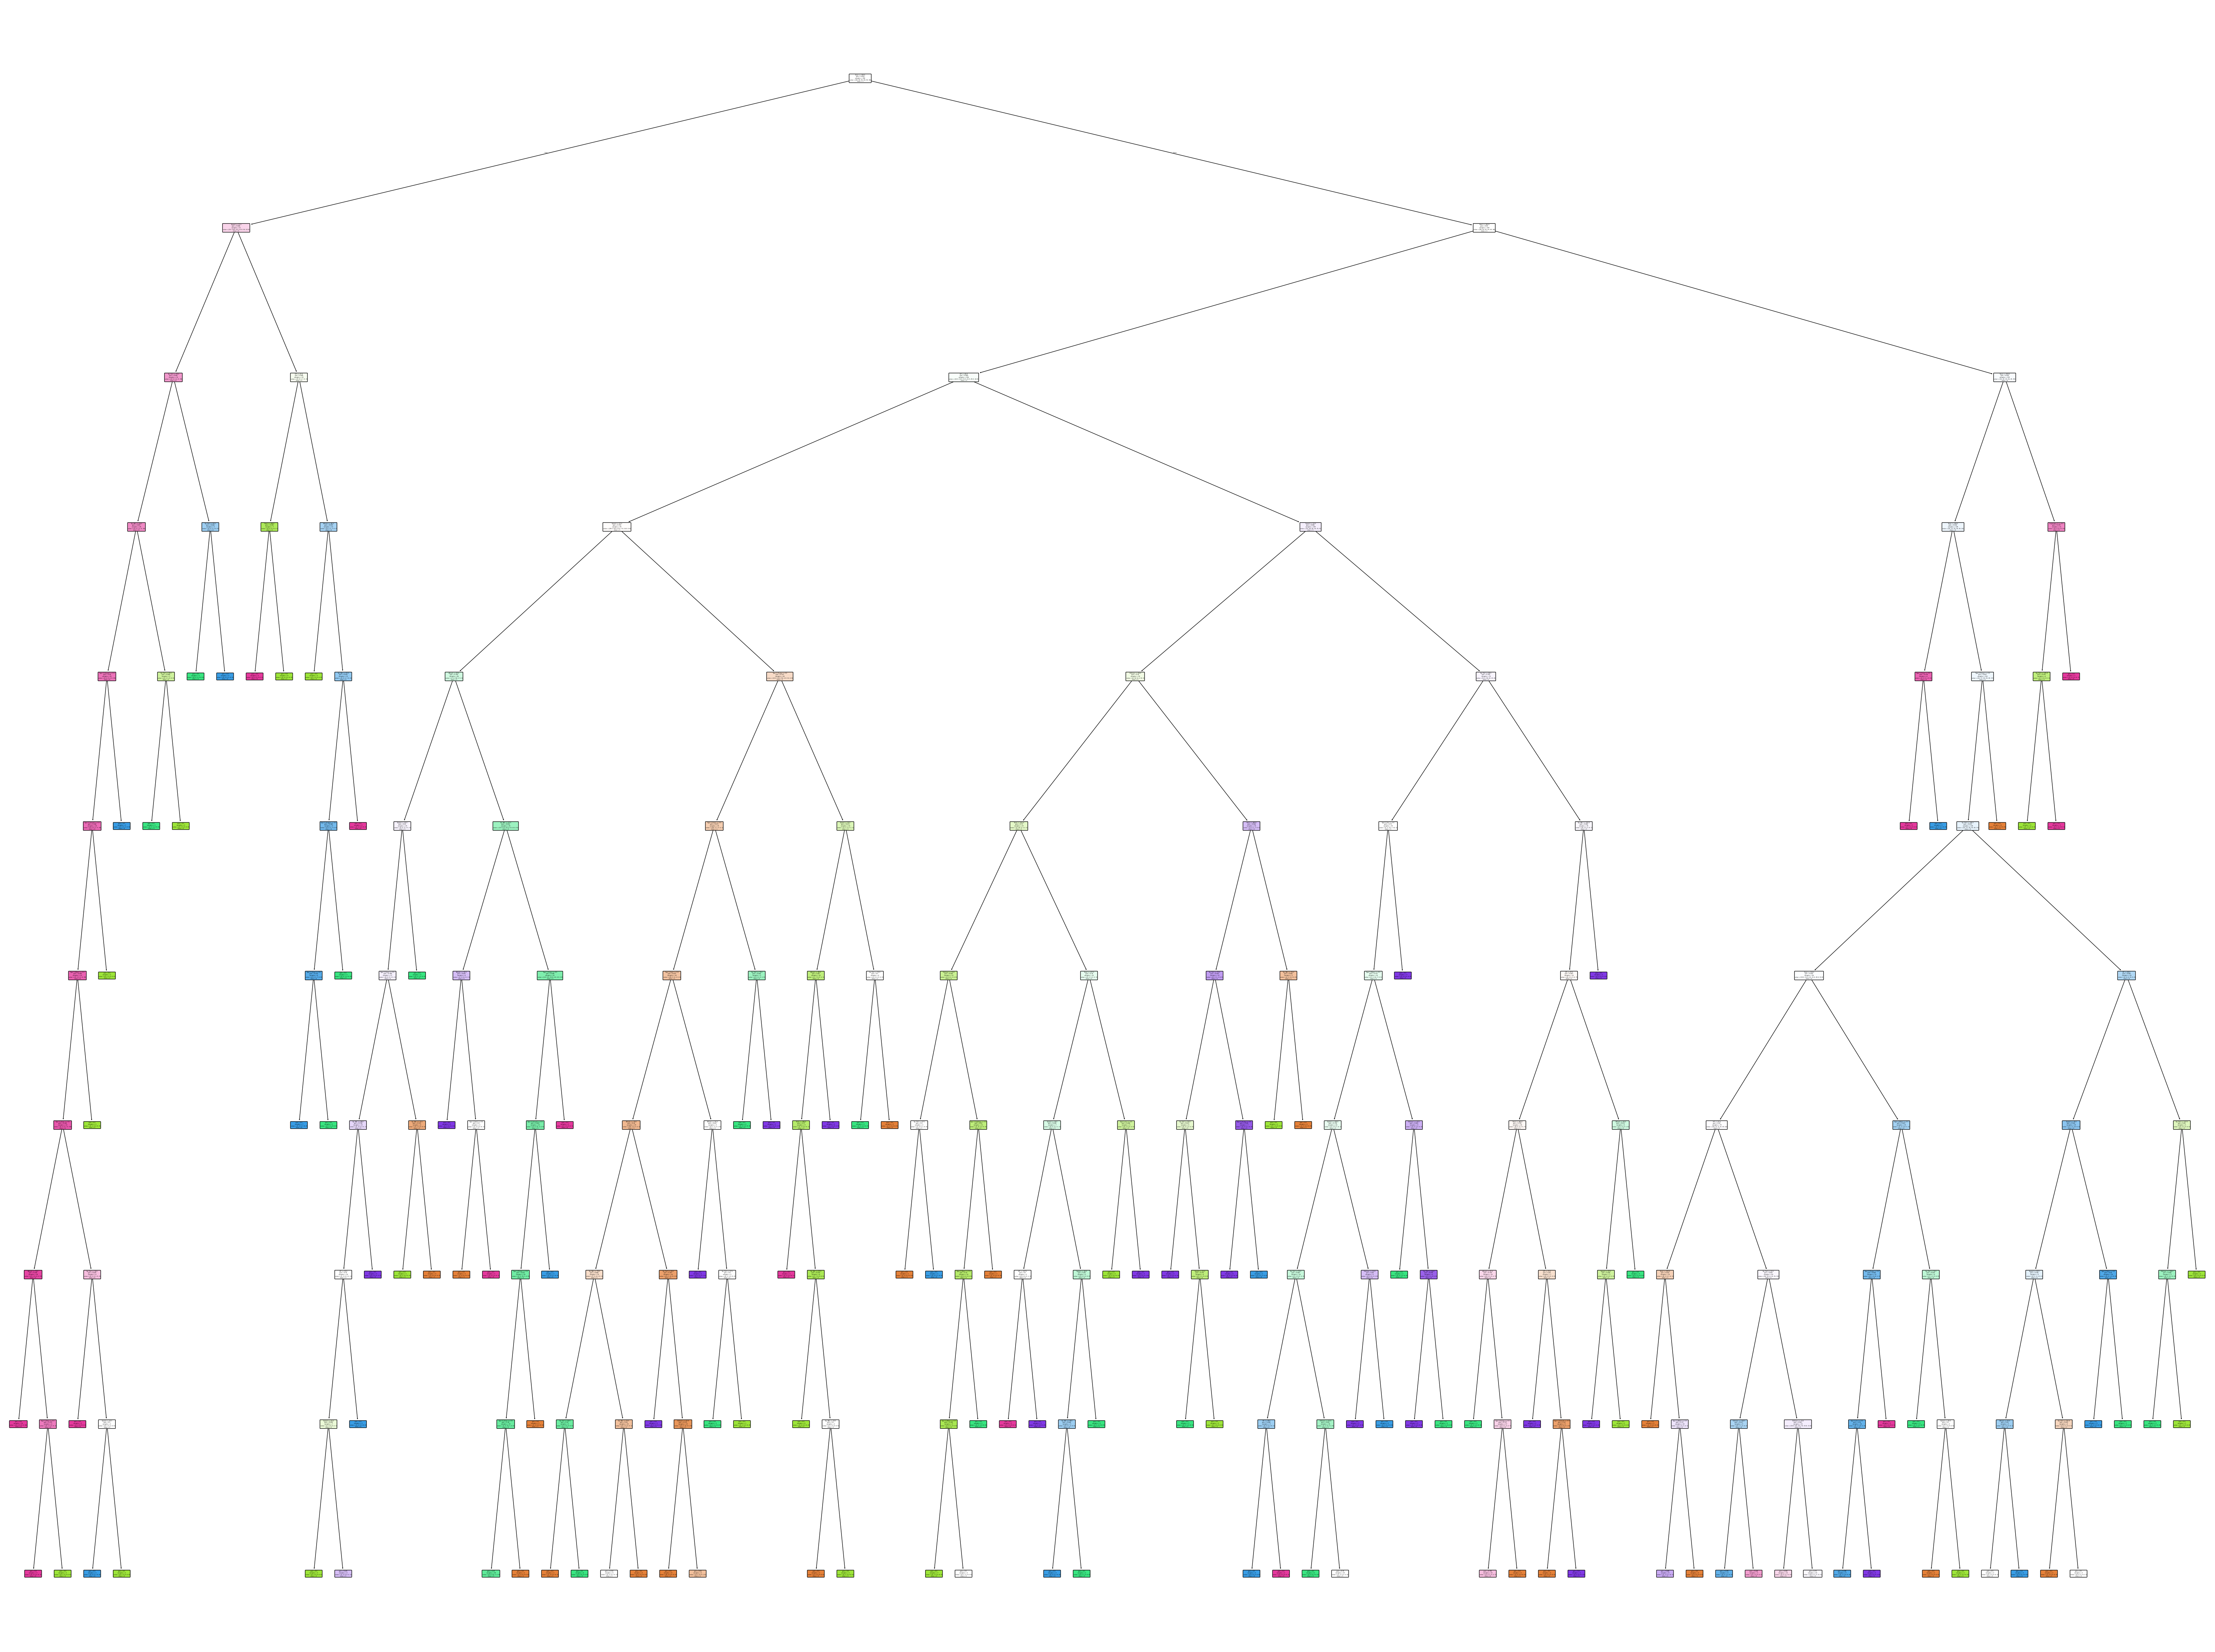

In [84]:
from sklearn.tree import plot_tree
# Визуализируем дерево решений
plt.figure(figsize=(80, 60))
plot_tree(tree_model, feature_names=X_processed_multi.columns, class_names=[str(item) for item in sorted(y_multi.unique())], filled=True, rounded=True)
plt.show()